# Your name: Max Kaiser 
## Assignment Name: CA05 - Logistic Regression 

# Program Inititialization Section
## Enter your import packages here

In [68]:
# import packages 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt #plot AUC 
from sklearn import linear_model 

from sklearn import linear_model 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
#from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve



# Data File Reading Section
## Write code to read in data from external sources here

In [127]:
#read datasets

#df = pd.read_csv('cvd_data.csv',na_values='NA')

df = pd.read_csv('https://github.com/ArinB/CA05-B-Logistic-Regression/raw/master/cvd_data.csv',na_values='NA')

df.head(5)


,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2


# **Data Quality Analysis**

In [4]:
#Q1
df.describe().round(1)

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
count,3242.0,3242.0,3242.0,3242.0,3242.0,3242.0,3242.0,3242.0,3242.0,3242.0,3242.0,3242.0,3242.0,3242.0,3242.0,3242.0,3242.0
mean,0.6,64.8,1.1,2.3,1.4,105.4,37.6,97.2,82.9,12.9,0.4,0.3,0.1,2.5,2.3,4.3,3.9
std,0.5,10.4,0.4,0.7,0.9,10.3,4.1,13.6,7.8,20.2,1.2,0.5,0.3,0.7,1.0,1.0,0.6
min,0.0,39.0,1.0,1.0,1.0,44.0,25.0,67.0,57.4,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
25%,0.0,57.0,1.0,2.0,1.0,99.0,34.4,88.0,78.2,0.0,0.0,0.0,0.0,2.0,2.0,4.0,4.0
50%,1.0,65.0,1.0,2.0,1.0,104.0,37.2,97.0,82.6,0.3,0.0,0.0,0.0,3.0,2.0,4.0,4.0
75%,1.0,73.0,1.0,3.0,1.0,110.0,40.5,106.0,86.6,20.5,0.0,1.0,0.0,3.0,3.0,5.0,4.0
max,1.0,90.0,3.0,4.0,8.0,168.0,53.0,135.0,136.7,170.5,30.0,1.0,1.0,3.0,6.0,6.0,5.0


In [5]:
#Q2
df.shape
# 17 columns 
# 3242 rows 

(3242, 17)

In [6]:
#Q3
df.count()

cvd_4types      3242
age_s1          3242
race            3242
educat          3242
mstat           3242
hip             3242
neck20          3242
waist           3242
av_weight_kg    3242
cgpkyr          3242
tea15           3242
srhype          3242
parrptdiab      3242
bend25          3242
happy25         3242
tired25         3242
hlthlm25        3242
dtype: int64

In [7]:
#Q4 
df.isnull().sum()
#no missing values 

cvd_4types      0
age_s1          0
race            0
educat          0
mstat           0
hip             0
neck20          0
waist           0
av_weight_kg    0
cgpkyr          0
tea15           0
srhype          0
parrptdiab      0
bend25          0
happy25         0
tired25         0
hlthlm25        0
dtype: int64

In [8]:
#Q5 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cvd_4types    3242 non-null   int64  
 1   age_s1        3242 non-null   int64  
 2   race          3242 non-null   int64  
 3   educat        3242 non-null   int64  
 4   mstat         3242 non-null   int64  
 5   hip           3242 non-null   float64
 6   neck20        3242 non-null   float64
 7   waist         3242 non-null   float64
 8   av_weight_kg  3242 non-null   float64
 9   cgpkyr        3242 non-null   float64
 10  tea15         3242 non-null   int64  
 11  srhype        3242 non-null   int64  
 12  parrptdiab    3242 non-null   int64  
 13  bend25        3242 non-null   int64  
 14  happy25       3242 non-null   int64  
 15  tired25       3242 non-null   int64  
 16  hlthlm25      3242 non-null   int64  
dtypes: float64(5), int64(12)
memory usage: 430.7 KB


In [9]:
#Q6 Top 10 
df.head(10)

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.00,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.00,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.50,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.00,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.00,0,0,0,2,1,1,2
5,0,67,1,3,3,140.0,35.5,101.0,87.2,0.00,0,1,0,1,1,4,4
6,0,68,1,2,1,101.0,39.0,93.0,80.5,9.20,0,0,0,2,3,4,4
7,0,67,1,2,1,107.0,32.0,80.0,73.2,0.00,0,1,0,2,2,4,4
8,0,44,1,2,1,100.0,36.5,89.0,79.1,6.75,0,0,0,3,3,4,4
9,0,42,1,2,1,105.0,35.5,90.0,78.1,21.00,0,0,0,3,2,3,3


In [10]:
#Q6 Bottom 10 
df.tail(10)

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
3232,1,55,1,4,1,117.0,35.5,107.0,88.4,0.0,3,0,0,3,1,5,4
3233,1,71,1,1,2,114.0,35.0,117.0,85.1,0.0,0,1,0,1,3,4,4
3234,1,55,1,3,1,93.0,29.5,81.0,76.7,0.0,0,0,0,3,2,4,4
3235,1,59,1,1,1,104.0,40.0,101.0,87.5,0.0,0,1,0,3,2,5,4
3236,1,54,1,2,1,115.0,36.0,103.0,84.4,14.0,0,0,0,3,2,5,4
3237,1,66,1,2,1,95.0,41.5,99.0,88.2,0.0,0,1,0,2,2,5,4
3238,1,54,1,3,1,99.0,34.9,99.0,83.3,30.0,0,0,0,3,3,3,4
3239,1,55,1,4,1,101.0,37.0,91.0,75.2,0.0,0,0,0,3,2,5,4
3240,1,53,1,2,1,98.0,39.0,93.0,79.0,0.0,0,0,0,2,2,5,4
3241,1,54,1,2,1,109.0,48.6,112.0,93.5,39.0,0,1,0,3,2,5,4


# **Model Building**

Binary Classifier - Predict CVD Risk (Yes/No, or 1/0) using a Logistic Regression Model

1. Store the feature matrix (X) and response vector (y)

In [128]:

# always capital letter X, vector small y
# X = Matri(2-dimensional) all data 
# y = response variable

y = df.cvd_4types	
X = df.drop('cvd_4types', axis= 1)

In [43]:
print(X.shape)
print(y.shape)

(3242, 16)
(3242,)


In [129]:
import statsmodels.api as sm
logit_model = sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.607367
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.103     
Dependent Variable: cvd_4types       AIC:              3970.1708 
Date:               2021-03-26 02:24 BIC:              4067.5139 
No. Observations:   3242             Log-Likelihood:   -1969.1   
Df Model:           15               LL-Null:          -2194.3   
Df Residuals:       3226             LLR p-value:      1.6785e-86
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
age_s1         0.0143    0.0035   4.0551  0.0001   0.0074   0.0212
race          -0.9012    0.1185  -7.6023  0.0000  -1.1336  -0.

Removing variables/features with p-values greater than 0.05. (statistically not significant)

In [130]:
#columns to remove (neck20,cgpkyr,srhype,happy25,tea15)

col = ['age_s1','race','educat','mstat','hip','waist','av_weight_kg','parrptdiab','bend25','tired25','hlthlm25']


# X only with significant feature columns 
X = X[col]

# response variable y stays the same 

logit_model = sm.Logit(y,new_X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.608680
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.101     
Dependent Variable: cvd_4types       AIC:              3968.6828 
Date:               2021-03-26 02:25 BIC:              4035.6062 
No. Observations:   3242             Log-Likelihood:   -1973.3   
Df Model:           10               LL-Null:          -2194.3   
Df Residuals:       3231             LLR p-value:      1.1113e-88
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
age_s1         0.0145    0.0034   4.2092  0.0000   0.0077   0.0212
race          -0.9074    0.1181  -7.6836  0.0000  -1.1388  -0.

In [131]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [132]:
# Fit (train) the Logistic Regression classifier 

clf = linear_model.LogisticRegression(C=1e40,solver='newton-cg')

fitted_model = clf.fit(X,y)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


In [133]:
# 2-dimensional numpy array
#1st column is the predicted porbability of class 0 (no risk) for each 
#observation
#2nd column is the predicted porbability of class 1 (risk) for each 
#observation

clf.predict_proba(X_test)

array([[0.42926454, 0.57073546],
       [0.42586143, 0.57413857],
       [0.51268155, 0.48731845],
       ...,
       [0.67264383, 0.32735617],
       [0.45216873, 0.54783127],
       [0.33318248, 0.66681752]])

In [134]:
# now calculating the predicted probability of risk = 1 for each testing set observation
# I want all rows and only the 2nd column (at risk column) by using [:, 1]
clf.predict_proba(X_test)[:, 1]


array([0.57073546, 0.57413857, 0.48731845, 0.55302168, 0.65568438,
       0.47795347, 0.12550107, 0.34870578, 0.80783376, 0.63327909,
       0.5039416 , 0.66571849, 0.79118164, 0.83803663, 0.6732719 ,
       0.52240678, 0.32306787, 0.77934111, 0.53506381, 0.90704895,
       0.71366344, 0.60795979, 0.47315024, 0.56088901, 0.50426164,
       0.22247385, 0.56194375, 0.42548877, 0.2768639 , 0.57054396,
       0.52161796, 0.70656571, 0.77389692, 0.79756339, 0.59496007,
       0.52260443, 0.65231415, 0.58361905, 0.62964992, 0.51554087,
       0.27772315, 0.44155402, 0.71126392, 0.4691188 , 0.74675666,
       0.31630359, 0.6411198 , 0.90015528, 0.64738983, 0.59962927,
       0.67403738, 0.70840215, 0.63797914, 0.59301273, 0.26669024,
       0.08216517, 0.55818973, 0.76978274, 0.63209817, 0.8343744 ,
       0.80966318, 0.76796579, 0.77255605, 0.55460561, 0.2384385 ,
       0.71857313, 0.25243125, 0.12364425, 0.59215055, 0.53059197,
       0.59172048, 0.73200733, 0.76222463, 0.7246431 , 0.25230

In [135]:
y_pred_prob= clf.predict_proba(X_test)[:, 1]

In [140]:
#calculate the AUC
from sklearn import metrics
print('AUC:',metrics.roc_auc_score(y_test, y_pred_prob))

AUC: 0.7355365047775779


In [142]:
#accuracy (fraction of correct predictions) --> correct predictions / total number of data points

# Using the score method to get accuracy of model
print('Accuracy score:',clf.score(X_test, y_test))

#Source:
#https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a


Accuracy score: 0.6091245376078915


# **Part 2 (Feature Importance)**

**Display the Feature Importance of all the features sorted in the order of decreasing influence on the CVD Risk**

In [195]:
clf.fit(X/ np.std(X, 0),y)

#the higher the absolute value of a feature coefficient --> importance

coef_table = pd.DataFrame(abs(clf.coef_), columns= col).transpose().sort_values(by=0,ascending=False)
coef_table.rename(columns={0: "coef"},inplace=True)

coef_table


,coef
waist,1.008078
hip,0.548939
race,0.362810
hlthlm25,0.359956
av_weight_kg,0.271942
educat,0.180753
parrptdiab,0.153321
mstat,0.133919
tired25,0.130611
bend25,0.087885


The features waist, hip, race, hlthlm25,av_weight_kg have the largest influence on the outcome (target variable). 

# **Part 3 (ROC Curve)**

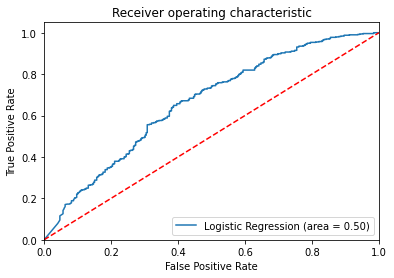

In [198]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


#Research on how to plot ROC curve 

#Source:https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8